### Fuel Solution using a Neural Net

In [2]:
import math
import numpy as np
import pandas as pd
from datetime import datetime
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Read in the data

In [4]:
df = pd.read_csv('airline-passengers.csv')

Take a first look at the data

In [6]:
df.head(5)

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [7]:
df.shape

(144, 2)

Lets get a feel for the stock price trend through a visualisation of closing price history

In [9]:
data =df.filter(['Passengers'])

Convert the dataframe to a numpy array (A 2 dimensional matrix)

In [11]:
dataset = data.values

Get the number of rows to train the LSTM model on (I want 80% of the data to train with)

Use math.ceil to round the numbers

In [13]:
training_data_len = math.ceil( len(dataset) * .8 )

Lets see what 80% of 749 looks like

In [15]:
training_data_len 

116

We see that it is 600 rows

In [17]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)

The above code computes the Min and Max Values to be used for scaling and 
then transforms the data based on these 2 values. Range is inclusive of 0 & 1
And what does this scaled data look like?

In [19]:
#scaled_data
dataset

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

Now we will create the trained data set (Notice that the length of the training set is the 80% of the total data that we found earlier)

In [21]:
train_data = dataset[0:training_data_len , :]

Create 2 arrays to hold the training data. x_train is the Independent Variables and y_train is the Target or Dependent Variable

In [23]:
x_train =[]
y_train =[]

So now we need a loop to iterate through the training data to split our data into X_Train and y_Train
So the loop splits the data and x_train will get rows zero to 30 while y_train gets row 31 and so on untill all the data is distributed

In [25]:
for i in range(6, len(train_data)):
    x_train.append(train_data[i-6:i,0])
    y_train.append(train_data[i,0])

Now convert the x_train and y_train to numpy arrays to train the LTSM Neural Net model

In [27]:
x_train, y_train = np.array(x_train), np.array(y_train)

Now the LSTM Model expects three dimensions, namely: number of samples (570), number of features or columns,(1) and number of time steps (30)

In [29]:
x_train =np.reshape(x_train,(x_train.shape[0], x_train.shape[1],1))
x_train.shape

(110, 6, 1)

If we run the above code we can see the shape of our array(570,30 and 1 in x_train)

Now let's build our LSTM Neural Net Model

In [32]:
model = Sequential()
model.add(LSTM(500, return_sequences = True, input_shape = (x_train.shape[1], 1)))
#model.add(LSTM(20, return_sequences = True))
model.add(LSTM(10, return_sequences = False))
model.add(Dense(1))

C:\Users\Lecturer\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Compile the Model

In [34]:
#model.compile(optimizer='adam', loss = 'mean_squared_error')
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

Now train the model

In [36]:
model.fit(x_train, y_train, batch_size = 5, epochs = 50)

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.0126 - loss: 0.0571
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0016 - loss: 0.0125    
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0036 - loss: 0.0130  
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0012 - loss: 0.0109    
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0079 - loss: 0.0091  
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0055 - loss: 0.0108  
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0016 - loss: 0.0064    
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0112 - loss: 0.0099 
Epoch 9/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0238 - loss: 0.0067 
Epoch 10/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0012 - loss: 0.0084    
Epoch 11/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0238 - loss: 0.0056     
Epoch 12/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms

An epoch is the number of iterations when an entire dataset is passed foreward and back through a neural network whist the batch size is the number of observations used in the weighting

Create the testing data set
First create a new array containing scaled values from index 600 to 749

In [39]:
test_data = dataset[training_data_len -6: , :]

Create the data sets x_test, y_test

In [41]:
x_test = []
y_test = dataset[training_data_len:, :]

So now we need a loop to iterate through the data to split our data into X_Test and y_Test So the loop splits the data and x_test will get rows zero to 30 while y_test gets row 31 and so on untill all the data is distributed

In [43]:
for i in range(6,len(test_data)):
    x_test.append(test_data[i-6:i, 0])

Convert the data to a numpy array (Tabular 2 D Matrix)

In [45]:
x_test = np.array(x_test)

Reshape the data. The model expects a three dimensional shape

In [47]:
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1))

Get the models predicted price values

In [49]:
predictions = model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


Ideally we want predictions to contain the same values as our y_test data set This would mean that our model is 100% accurate (However this is very doubtful!) 

Next we need to unscale our data 

In [51]:
predictions = scaler.inverse_transform(predictions)

Get the root mean squared error (RMSE). This is the standard deviation of the residuals and the lower values of RMSE usually mean a better fit

In [53]:
rmse = np.sqrt(mean_squared_error(scaler.inverse_transform(y_test),predictions))
r2_value = r2_score(scaler.inverse_transform(y_test),predictions)

In [54]:
print("Root Mean Square Error: ", rmse)
print("R^2 Value: ", r2_value)

Root Mean Square Error:  45.092733645470275
R^2 Value:  0.6703228240758492


Now plot the data

In [56]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

C:\Users\Lecturer\AppData\Local\Temp\ipykernel_11432\2657761684.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


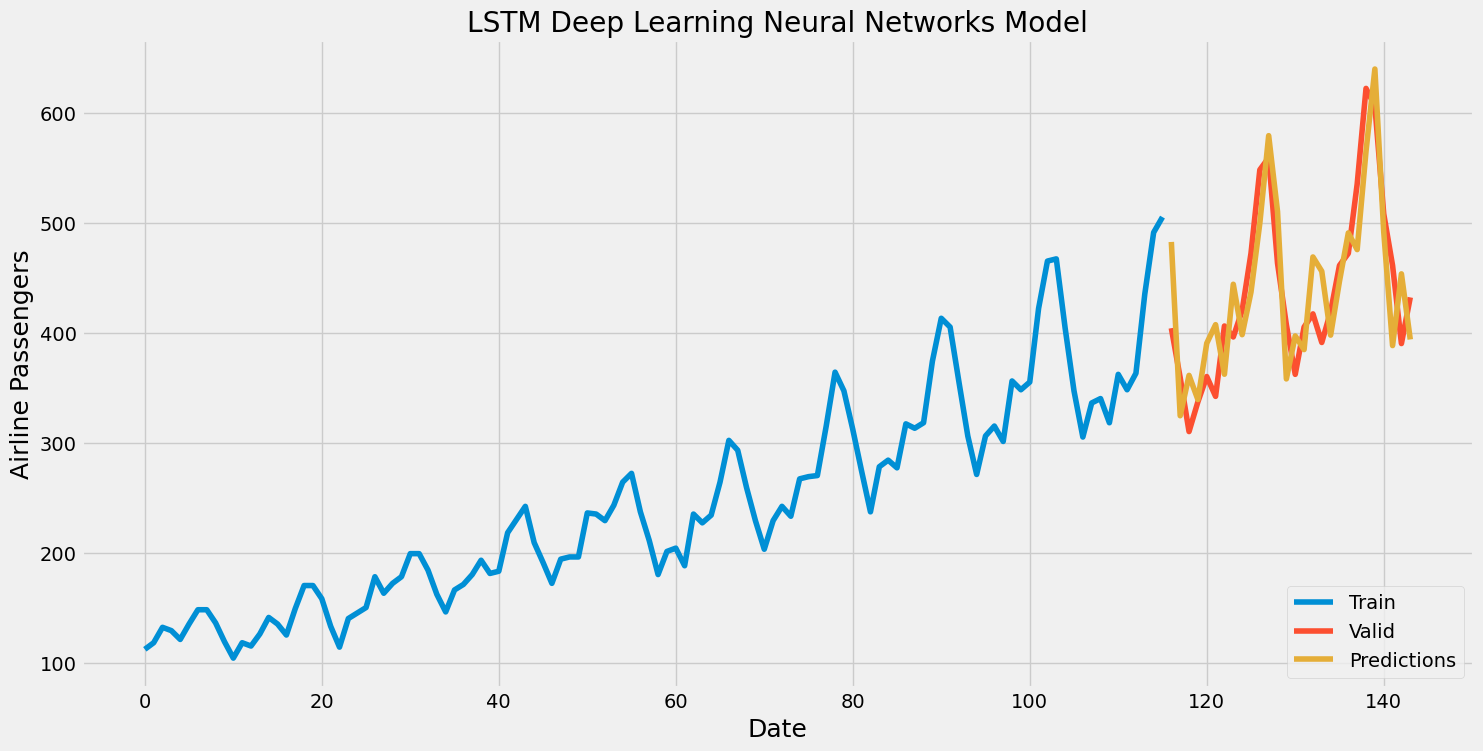

In [57]:
plt.figure(figsize=(16,8))
plt.title('LSTM Deep Learning Neural Networks Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Airline Passengers', fontsize=18)
plt.plot(train['Passengers'])
plt.plot(valid[['Passengers', 'Predictions']])
plt.legend(['Train', 'Valid', 'Predictions'], loc = 'lower right')
plt.show()

The graph shows the 80% training data in blue, the valid or 'actual' 
(expected) stock value in red and the predicted stock values in yellow

Now let's show the valid (or actual) price and predicted price

In [60]:
air_pred = pd.read_csv('airline-passengers.csv')

Create a new dataframe

In [62]:
new_df = air_pred['Passengers']

Get the last 30 days price values and convert the dataframe to an array

In [64]:
last_6_months = new_df[-6:].values

Scale the data to be values between 0 and 1

In [66]:
last_6_months_scaled = scaler.transform(last_6_months.reshape(-1, 1))

Create an empty list

In [68]:
X_test2 = []

Append the last 30 days to the x_test2

In [70]:
X_test2.append(last_6_months_scaled)

Convert the x_test dataset to a numpy array

In [72]:
X_test2 = np.array(X_test2)

Reshape the data

In [74]:
X_test2 = np.reshape(X_test2,(X_test2.shape[0],X_test2.shape[1], 1))

Get the predicted scaled price

In [76]:
pred_price = model.predict(X_test2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


undo the scaling

In [78]:
pred_price = scaler.inverse_transform(pred_price)
print('The predicted 6 months from the end, is: ', pred_price)                                      

The predicted 6 months from the end, is:  [[502.91742]]
